In [1]:
# !pip install matplotlib
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install sklearn
# !pip install xgboost

In [2]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

# 그래프에서 마이너스 기호가 표시되게 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

## 프리시즌 데이터 분석

In [3]:
preseason_df = pd.read_csv('../datasets/Pre_Season_Batter.csv')
regular_season_df = pd.read_csv("../datasets/Regular_Season_Batter.csv")

print(preseason_df.shape)
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [4]:
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


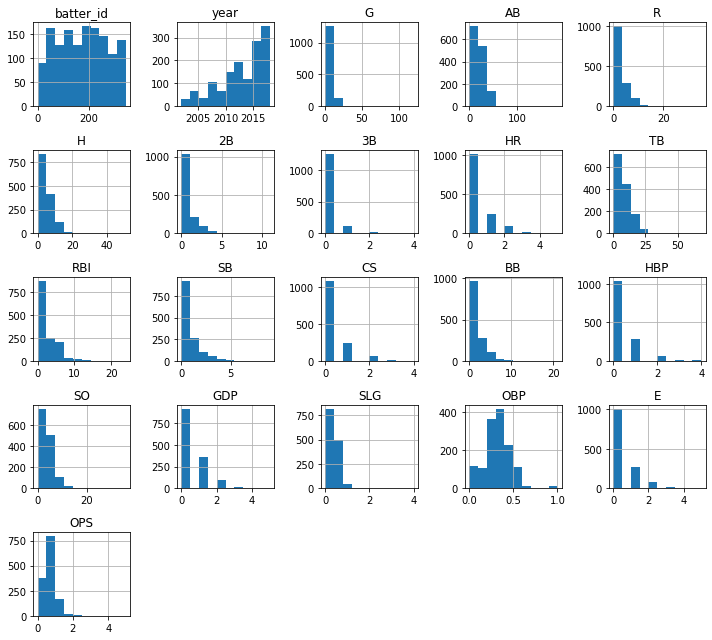

In [5]:
preseason_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [6]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
regular_count

year
1993      1
1994      2
1995      1
1996      7
1997      8
1998     10
1999     14
2000     20
2001     32
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

In [7]:
# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

# 과거로 갈수록 프리시즌의 기록이 정규시즌보다 적어지는 것을 알 수 있음
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')], axis=1).transpose().loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [8]:
# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] +\
    regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)
print(regular_season_df['new_idx'], preseason_df['new_idx'])

0       가르시아2018
1        강경학2011
2        강경학2014
3        강경학2015
4        강경학2016
          ...   
2449     황진수2014
2450     황진수2015
2451     황진수2016
2452     황진수2017
2453     황진수2018
Name: new_idx, Length: 2454, dtype: object 0       가르시아2018
1        강경학2011
2        강경학2014
3        강경학2015
4        강경학2016
          ...   
1388     황재균2014
1389     황재균2015
1390     황재균2016
1391     황재균2018
1392     황진수2014
Name: new_idx, Length: 1393, dtype: object


In [9]:
# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']). \
    intersection(preseason_df['new_idx']))
intersection_idx[:5]

['오태곤2017', '오선진2011', '박광열2015', '김강민2003', '손아섭2008']

In [10]:
# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new.shape

(1358, 30)

In [11]:
# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop=True)
preseason_new.head(2)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.55,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.00,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011


In [12]:
print(preseason_new.shape)

(1358, 30)


In [13]:
# 검정 코드
print(regular_season_new.shape, regular_season_new.shape)
sum(regular_season_new['new_idx'] == regular_season_new['new_idx'])

(1358, 30) (1358, 30)


1358

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51596 missing from current font.
  font.set_text(s, 0.0, flags=f

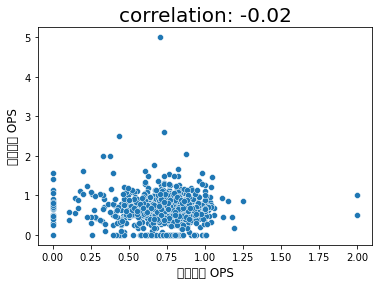

In [14]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation: '+ str(np.round(correlation,2)), fontsize=20)
plt.xlabel('정규시즌 OPS', fontsize=12)
plt.ylabel('프리시즌 OPS', fontsize=12)
plt.show()

## 정규시즌과 프리시즌의 성적 분포가 선형적인 모습을 띠고 있지 않다.
## 이는 정규시즌 데이터와 프리시즌 데이터가 서로 상관성이 매우 낮다는 것을 의미한다.

# 프리시즌 데이터의 경기 기록 수는 매우 적으므로 그 구성 역시 정규시즌 데이터와는 차이가 있을 수 있다.
# 결국 실제 분석에서는 프리시즌 데이터를 분석에서 제외한다.
# 대회의 예측 대상이 정규시즌의 성적이기 때문에 프리시즌 데이터를 사용하지 않는 것이 더욱 정밀한 결과를 도출할 것이다.

## 정규시즌 데이터 분석

In [15]:
regular_season_df = pd.read_csv("../datasets/Regular_Season_Batter.csv")
display(regular_season_df.shape, regular_season_df.head(), regular_season_df.describe())

(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


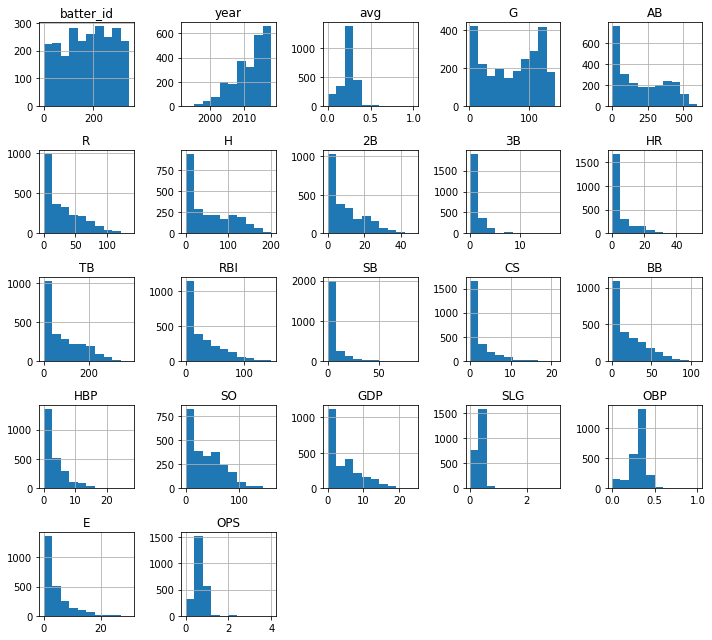

In [16]:
regular_season_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_

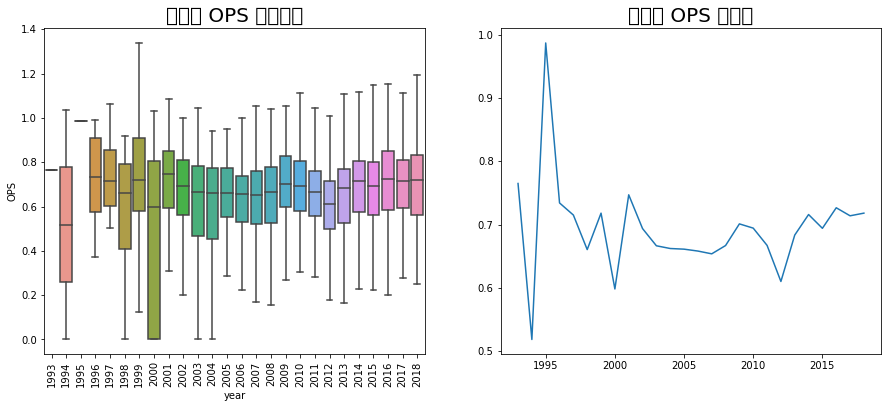

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
g = sns.boxplot(x='year', y='OPS', data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size= 20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size=20)
plt.show()

In [18]:
pd.crosstab(regular_season_df['year'], 'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


In [19]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index = ['team'], columns = 'year',
values = 'OPS', aggfunc='median')
med_OPS_team

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,
KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849337,0.829906,...,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.777000,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.689250,0.698978,0.645345,...,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.652500,0.636742,0.711000,0.703000,0.705000,0.6000
OB,NaN,NaN,NaN,NaN,0.615797,0.727667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.393000,...,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,NaN,NaN,0.853830,0.739755,0.695808,0.762809,...,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,...,0.680000,0.653000,0.676715,0.581845,0.600000,0.689000,0.622000,0.704000,0.728000,0.7100


In [20]:
# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:, 2005:].isna().sum(axis=1) <= 0 
team_idx

team
KIA      True
KT      False
LG       True
NC      False
OB      False
SK       True
넥센      False
두산       True
롯데       True
삼성       True
쌍방울     False
우리      False
한화       True
해태      False
현대      False
히어로즈    False
dtype: bool

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_

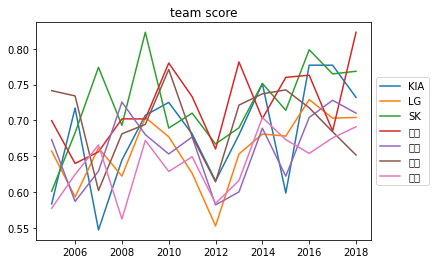

In [21]:
plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns,
loc = 'center left', bbox_to_anchor=(1,0.5))
plt.title('team score')
plt.show()

In [22]:
# 키와 몸무게 변수를 이용해 성적과 연관성 있는지 파악해보기
import re
regular_season_df['weight'] = regular_season_df['height/weight'].apply(lambda x : int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(lambda x : int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0], regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


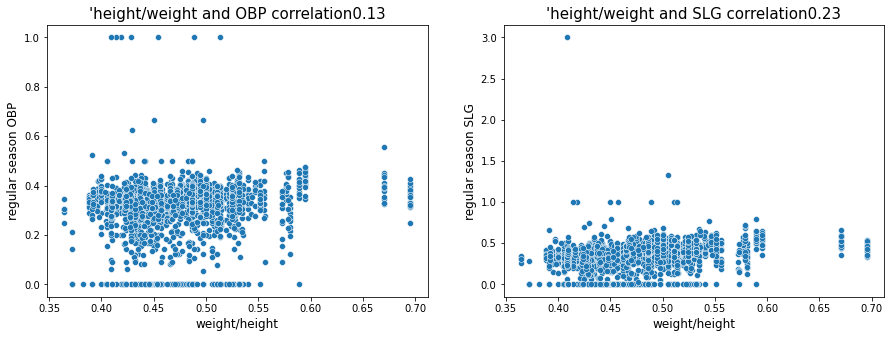

In [23]:
# 몸무게/키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight'] / regular_season_df['height']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title("'height/weight and OBP correlation" + str(np.round(correlation,2)), fontsize=15)
plt.ylabel('regular season OBP', fontsize=12)
plt.xlabel('weight/height', fontsize=12)
plt.subplot(1,2,2)


correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title("'height/weight and SLG correlation" + str(np.round(correlation,2)), fontsize=15)
plt.ylabel('regular season SLG', fontsize=12)
plt.xlabel('weight/height', fontsize=12)
plt.show()

# 일반적으로 키에 비해 몸무게가 크다면 힘이 셀 것이며 반대의 경우에는 스피드가 빠를 것이라고 추측
# 따라서 계산한 값이 크다면 힘과 연관성이 높은 장타율과의 상관관계를 보고,
# 값이 작을 때는 스피드가 중시되는 출루율과의 상관관계를 확인한다.

# 확인 결과, 데이터는 선형적인 모습을 띠지 않으며, 그 분포가 매우 고르게 분포돼 있음을 알 수 있다.
# 이는 몸무게 및 키가 장타율과 출루율에 큰 영향을 끼치지 않음을 의미

### Postion 에 따라서

In [24]:
# 포지션과 관련한 기록 확인
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [25]:
# 수비 포지션(내야수, 외야수 등)
# 타자가 주로 이용하는 의미(우투우타, 좌투좌타 등) 
# 데이터를 더 자세히 이해하기 위해 구분

regular_season_df['pos'] = regular_season_df['position'].apply(lambda x : x.split('(')[0] if pd.notnull(x) else x )

# 우타, 좌타, 양타
# 타자가 왼손잡이, 오른손잡이인지
# 수비 포지션은 어디인지 구분
regular_season_df['hit_way'] = regular_season_df['position'].apply(lambda x: x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


Text(0.5, 1.0, '타석방향별 OPS')

/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

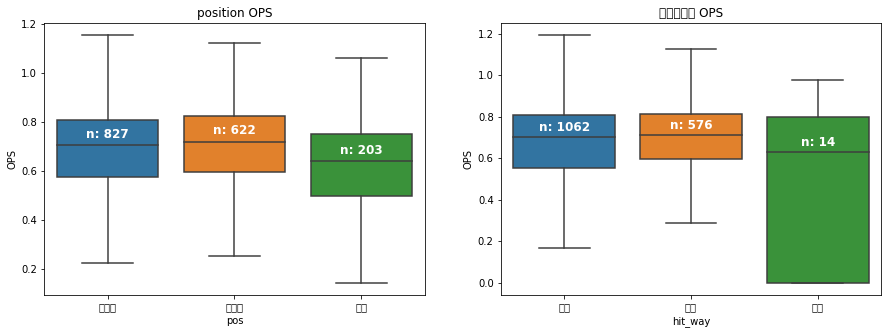

In [26]:
# 포지션별로 OPS 값을 살펴본 결과, 내야수와 외야수의 성적은 큰 차이가 없다.
# 하지만 포수의 OPS 는 다른 포지션보다 수치가 다소 작은 편이다.
# 즉 포수를 제외하고는 OPS 성적에는 포지션의 영향이 그리 크지 않다.
# 또한 타자가 왼손잡이, 오른손잡이인지에 따른 OPS 값은 큰 차이가 없다.
# 양손잡이의 OPS 가 다소 낮지만 관측 수가 적어 결과를 신뢰하기 힘들다.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='pos', y='OPS', data=regular_season_df, showfliers=False)

# position별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs : nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xtick text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels() :
    ax.text(xticks_labels.index(label.get_text()), 
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment = 'center', size = 'large', color ='w', weight='semibold')

ax.set_title('position OPS')


plt.subplot(1,2,2)
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_season_df, showfliers = False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick 은 tick 위치, label 은 그에 해당하는 text 값
for label in ax.get_xticklabels() :
    ax.text(xticks_labels.index(label.get_text()), 
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment = 'center', size = 'large', color ='w', weight='semibold')
ax.set_title('타석방향별 OPS')

In [27]:
# 커리어와 관련한 변수를 사용해 외국인과 내국인을 구별해 데이터를 탐색해보자.

# 한국인은 초-중-고로 구분이 되어 있는 것 같고
# 외국인은 이러한 형식이 아닌 국가와 대학 순서로 정보를 보유중
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [28]:
# career를 split
foreign_country = regular_season_df['career'].apply(lambda x: x.replace('-', ' ').split(' ')[0])

# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(lambda x: np.nan if '초' in x else x)))
foreign_country_list

[nan, '네덜란드', '도미니카', '미국', '캐나다', '쿠바']

In [29]:
foreign_country

0          쿠바
1       광주대성초
2       광주대성초
3       광주대성초
4       광주대성초
        ...  
2449      석천초
2450      석천초
2451      석천초
2452      석천초
2453      석천초
Name: career, Length: 2454, dtype: object

In [30]:
# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['네덜란드', '도미니카', '미국', '캐나다', '쿠바']

In [31]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(lambda x : x if pd.isnull(x)  else ('foreign' if x in foreign_country_list else 'korean'))
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text

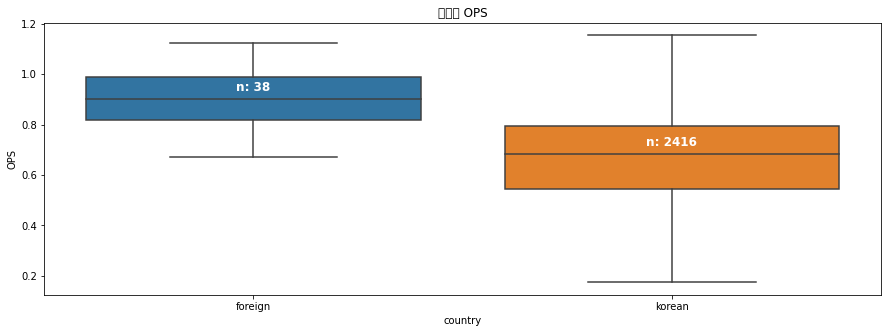

In [32]:
# 비교적으로 내국인 순서들보다 외국인 선수들의 OPS 성적이 좋은 경향을 보인다.
# 비록 외국인 선수의 숫자가 많지 않지만, 명확한 차이가 존재한다.

plt.figure(figsize=(15,5))
ax = sns.boxplot(x='country', y='OPS', data=regular_season_df, showfliers=False)

# 국적별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()

# 내외국인의 관측치수 dict
nobs = regular_season_df['country'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels() :
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, \
        nobs[label.get_text()], horizontalalignment = 'center', size = 'large', color = 'w', weight = 'semibold')
ax.set_title('국적별 OPS')
plt.show()

In [33]:
# 연봉 데이터
# '달러'와 '만원' 표기가 혼재해 있다.
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
6500만원       10
33000만원      10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


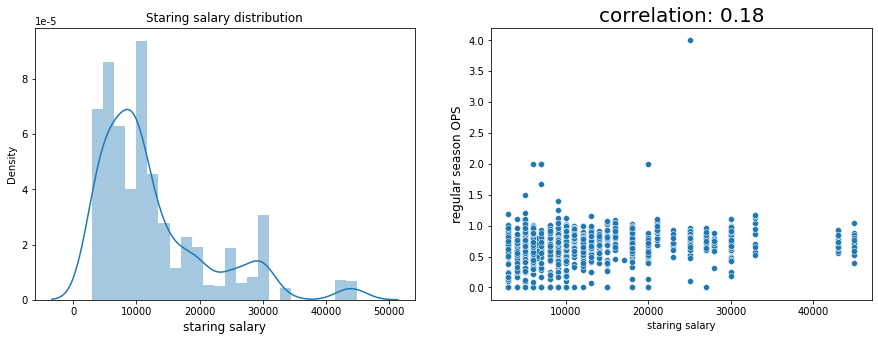

In [34]:
# 첫 연봉과 성적은 큰 상관성을 보이지 않는다.
# 첫 연봉에 따른 성적은 왼쪽으로 약간 치우친 정규분포 형태를 보이고 상관관계는 0.18에 그친다.

# 결측치라면 그대로 0으로 두고 '만원'이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다.
# 그외 만 원 단위가 아닌 초봉은 결측치로 처리한다.
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(lambda x: x if pd.isnull(x) else(int(re.findall('\d+', x)[0]) if '만원' in x else np.nan))
regular_season_df['starting_salary']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel('staring salary', fontsize=12)
b.set_title('Staring salary distribution')
plt.subplot(1,2,2)

# 정규시즌과 프리시즌의 상관관계
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b= sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation: ' + str(np.round(correlation, 2)), fontsize=20)
b.set_ylabel('regular season OPS', fontsize=12)
b.set_xlabel('staring salary')
plt.show()

### 정규시즌 데이터를 탐색한 결과
- 먼저 OPS 성적과 높은 연관성을 띠는 주어진 데이터에서의 변수가 부족
- 외국인 선수 OPS가 다소 넢은 경향이 있으나, 외국인 선수는 매해 명단이 달라지며 그 숫자도 부족해 분석에 적용하기에는 한계가 있다.
- 정규시즌의 탐색적 데이터 분석 결과, 주어진 데이터를 그대로 활용하는 것이 아닌 조금 다른 차원에서의 접근이 필요한 상황

### 일별 데이터 분석

In [35]:
day_by_day_df = pd.read_csv('../datasets/Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,0,0,0,0,1,0,0,0,0.158,2018
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,0,0,0,0,0,0,1,0,0.150,2018
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,0,0,0,0,0,0,1,0,0.182,2018
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0.182,2018


In [36]:
# 월별 데이터 현황을 살펴보면 결측치가 존재하는 것은, 시즌의 시작과 끝 시기가 조금씩 다를 수 있기 때문이라고 판단

# 날짜 (date)를 '.' 기준으로 나누고 첫 번째 값을 월(month)로 지정
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x: str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df = day_by_day_df.groupby(['year', 'month'])['avg2'].mean().reset_index()

# pivot_table 을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index=['month'], columns ='year', values='avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

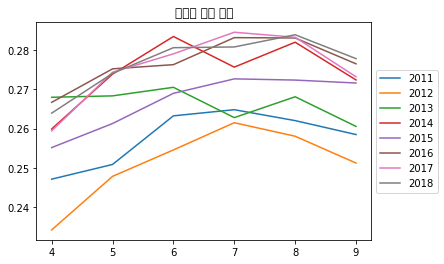

In [37]:
# 선수들의 연도와 월별 성적 변화
# 시즌 시작 직후에는 대부분 성적이 높지 않지만, 5~6월이 되어서는 어느 정도 안정화된다.
# 대회가 상반기까지의 성적을 예측하는 대회라는 것을 고려하면 모델링에 있어 매우 중요한 단서가 될 수 있는 정보

display(agg_df.iloc[2:, 10:])
plt.plot(agg_df.iloc[2:,10:])
plt.legend(agg_df.iloc[2:, 10:].columns,
    loc='center left', bbox_to_anchor=(1,0.5))
plt.title('연도별 평균 타율')
plt.show()

- 정규시즌 데이터에서 OPS가 외국인 여부에 따라 다르게 분포함을 파악
- 또한 정규시즌의 일별 데이터에서 연도별 월별 선수들의 누적 성적의 변화를 살펴보았다.
- 그 결과 OPS 성적의 평균이 월별로 달라지고 7월 이후에 성적이 수렴되는 것을 확인할 수 있었다.

## 데이터 전처리

# 결측치 처리 및 데이터 오류 처리
- 타율(avg), 장타율(SLG), 출루율(OBP) 등의 변수에 결측치가 존재한다.

In [39]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,802,0,1076,26,802,802,802,802,802,0


In [41]:
# 수치형 타입의 변수만 먼저 따로 추출하여 결측치를 처리
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # 모든 NUMERIC(수치형) 타입
num_cols = regular_season_df.select_dtypes(include=numerics).columns

# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 1개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1) >0, num_cols].head()

# 주어진 데이터에서 변수 G는 선수가 뛴 경기수를 의미한다.

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


In [43]:
# 정규 시즌 데이터에서 결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = \
    regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


In [44]:
# 일별 데이터에서 결측치를 0으로 채우기
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns] = \
    day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)
day_by_day_df

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6
